In [1]:
from datasets import load_dataset
import matplotlib.pyplot as plt
import cv2
from PIL import ImageDraw, Image
import re
from tqdm import tqdm
from paddleocr import PaddleOCR

In [2]:
dataset = load_dataset("ahmed-masry/unichart-pretrain-data")
dataset = dataset.filter(lambda example: example['query'] == '<extract_data_table>')
dataset

DatasetDict({
    train: Dataset({
        features: ['imgname', 'query', 'label'],
        num_rows: 494789
    })
})

In [3]:
ocr = PaddleOCR(use_angle_cls=True, lang="en")

[2024/07/06 23:17:09] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/Users/wjieun/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/Users/wjieun/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_

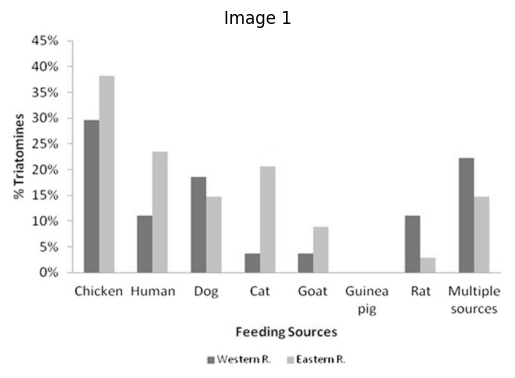

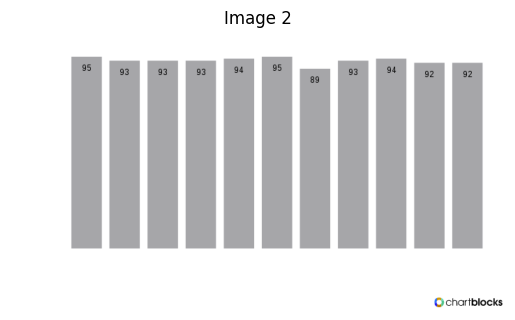

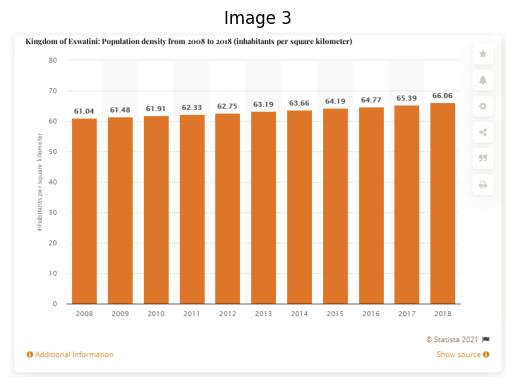

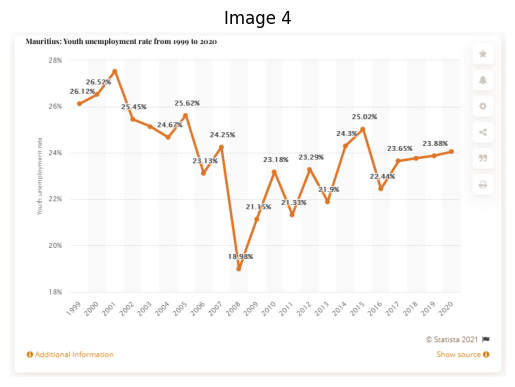

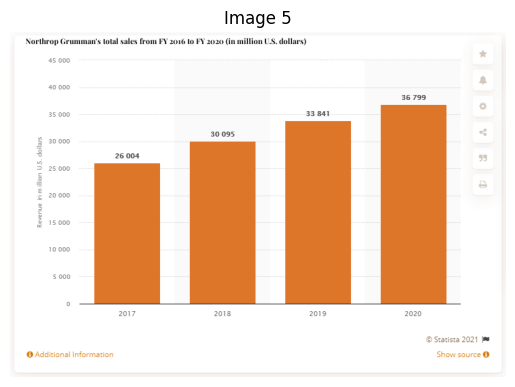

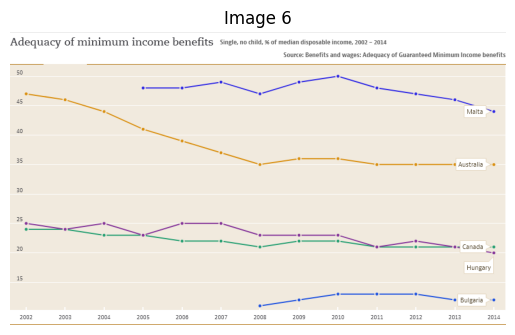

In [4]:
# original image 출력
num_images_to_display = 6

for i in range(num_images_to_display):
    img_name = dataset['train'][i * 5000]['imgname']
    img_path = f'../../../Data/UniChart_Images/{img_name}'
    img = cv2.imread(img_path)
    
    plt.figure()
    plt.imshow(img)
    plt.title(f'Image {i+1}')
    plt.axis('off')

plt.show()

In [5]:
def isDigitChar(input_string):
    return bool(re.match(r'^[0-9!@#$%^&*(),.?":{}|<>_+=\[\]\-\\`~\'/ \t]*$', input_string))

In [10]:
def mask_random_numbers_in_image(img):
    ocr_result = ocr.ocr(img, cls=False)[0]

    number_boxes = []
    result_img = Image.fromarray(img)
    
    for ocr_r in ocr_result:
        draw = ImageDraw.Draw(result_img)
        if isDigitChar(ocr_r[1][0]):
            x1, y1 = ocr_r[0][0]
            x2, y2 = ocr_r[0][2]
            number_boxes.append((x1, y1, x2, y2))
            draw.rectangle((x1, y1, x2, y2), outline=(255, 255, 0, 255))

    return result_img

  0%|          | 0/6 [00:00<?, ?it/s]

[2024/07/06 23:17:14] ppocr DEBUG: dt_boxes num : 24, elapsed : 0.1933307647705078
[2024/07/06 23:17:16] ppocr DEBUG: rec_res num  : 24, elapsed : 1.964508056640625


 17%|█▋        | 1/6 [00:02<00:10,  2.17s/it]

[2024/07/06 23:17:16] ppocr DEBUG: dt_boxes num : 12, elapsed : 0.1642749309539795
[2024/07/06 23:17:17] ppocr DEBUG: rec_res num  : 12, elapsed : 0.8929588794708252


 33%|███▎      | 2/6 [00:03<00:06,  1.52s/it]

[2024/07/06 23:17:17] ppocr DEBUG: dt_boxes num : 43, elapsed : 0.19050288200378418
[2024/07/06 23:17:21] ppocr DEBUG: rec_res num  : 43, elapsed : 3.784959077835083


 50%|█████     | 3/6 [00:07<00:07,  2.65s/it]

[2024/07/06 23:17:21] ppocr DEBUG: dt_boxes num : 33, elapsed : 0.18042206764221191
[2024/07/06 23:17:24] ppocr DEBUG: rec_res num  : 33, elapsed : 2.9730706214904785


 67%|██████▋   | 4/6 [00:10<00:05,  2.86s/it]

[2024/07/06 23:17:24] ppocr DEBUG: dt_boxes num : 32, elapsed : 0.1789538860321045
[2024/07/06 23:17:27] ppocr DEBUG: rec_res num  : 32, elapsed : 2.977717876434326


 83%|████████▎ | 5/6 [00:13<00:02,  2.97s/it]

[2024/07/06 23:17:28] ppocr DEBUG: dt_boxes num : 28, elapsed : 0.19979596138000488
[2024/07/06 23:17:31] ppocr DEBUG: rec_res num  : 28, elapsed : 3.2890708446502686


100%|██████████| 6/6 [00:17<00:00,  2.85s/it]


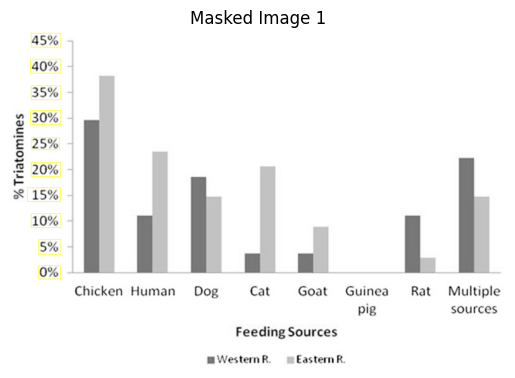

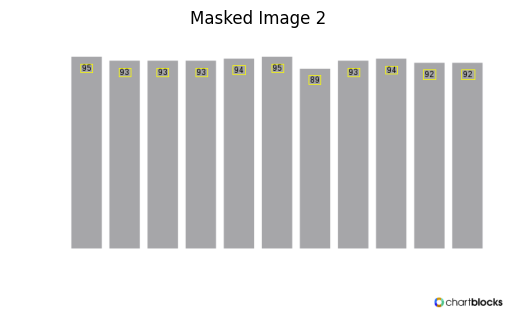

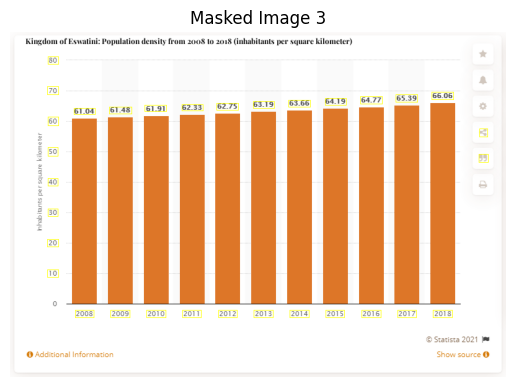

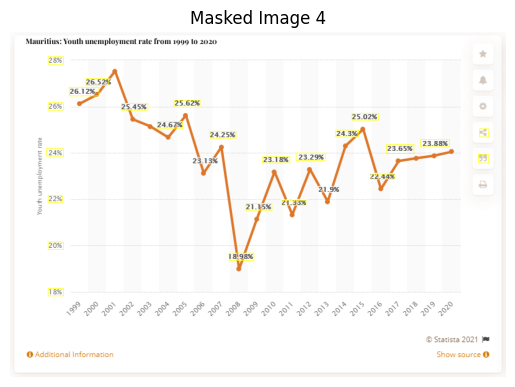

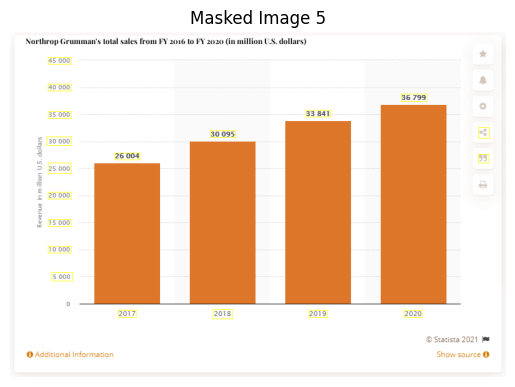

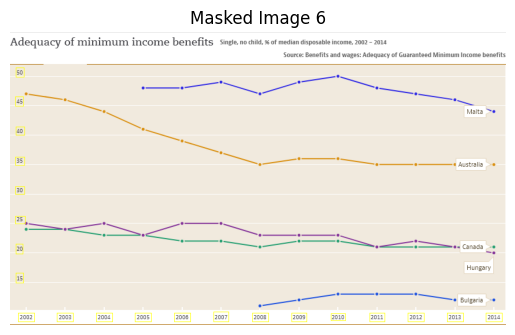

In [7]:
for i in tqdm(range(num_images_to_display)):
    img_name = dataset['train'][i * 5000]['imgname']
    img_path = f'../../../Data/UniChart_Images/{img_name}'
    img = cv2.imread(img_path)
    masked_img = mask_random_numbers_in_image(img)
    
    plt.figure()
    plt.imshow(masked_img)
    plt.title(f'Masked Image {i+1}')
    plt.axis('off')

plt.show()